# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

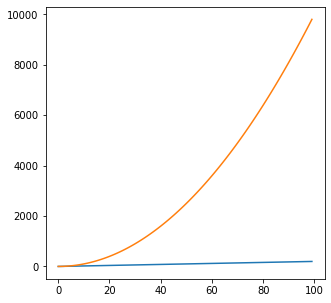

In [3]:
# Method 1
fig, axes = plt.subplots(1, 1, figsize = (5,5))
plt.plot(x,y)
plt.plot(x,z)


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

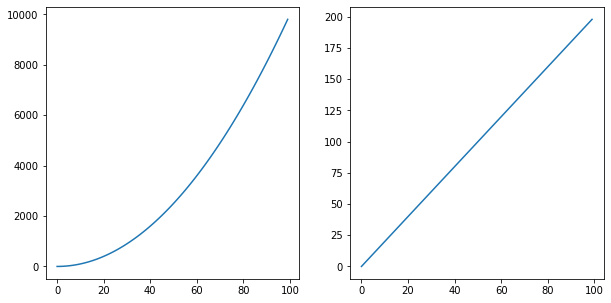

In [4]:
# Method 2
fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[1].plot(x,y)
axes[0].plot(x,z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0.5, 1.0, 'help')

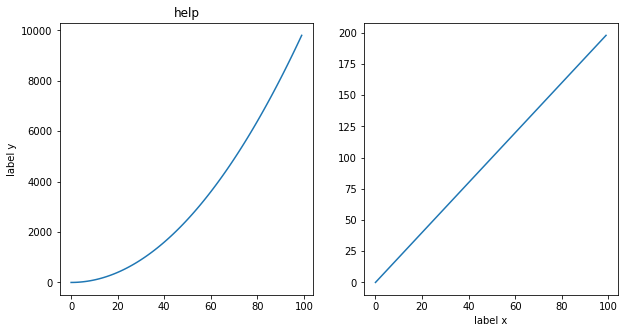

In [5]:
# your code here

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[1].plot(x,y)
axes[1].set_xlabel("label x")
axes[0].set_ylabel("label y")
axes[0].plot(x,z)
axes[0].set_title("help")

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

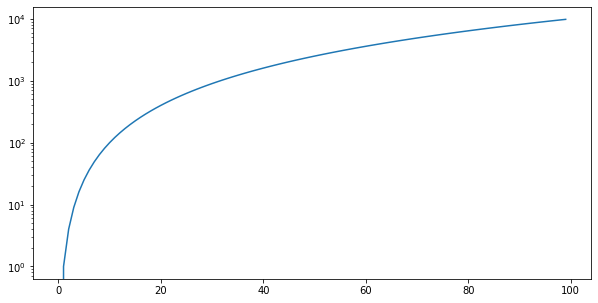

In [8]:
# your code here

#y = math.e(x)
z = x**2
fig, axes = plt.subplots(1, figsize = (10,5))

axes.set_yscale("log")
axes.plot(z)
axes.set_xscale("linear")

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
# your code here
fitbit = pd.read_csv("Fitbit2.csv")
#fitbit[{"Steps","Months_encoded"}].tail()
fitbit["Work_or_Weekend"].head()

0    1
1    0
2    0
3    1
4    1
Name: Work_or_Weekend, dtype: int64

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [9]:
fitbit2 = fitbit.copy()

([<matplotlib.axis.XTick at 0x1c6440937f0>,
 <a list of 2 Text xticklabel objects>)

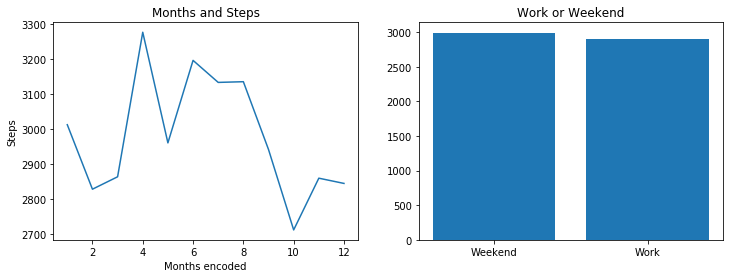

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here


fitbit["Steps"] = fitbit.groupby(["Months_encoded"]).median()

fitbit["Steps"].head()

fig, axes = plt.subplots(1, 2, figsize = (12,4))

axes[0].plot(fitbit["Steps"])
axes[0].set_xlabel("Months encoded")
axes[0].set_ylabel("Steps")
axes[0].set_title("Months and Steps")

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

fitbit2["Steps"] = fitbit2.groupby(["Work_or_Weekend"]).median()
ind = np.arange(2)
axes[1].bar(fitbit2["Work_or_Weekend"], fitbit2["Steps"])
axes[1].set_title("Work or Weekend")
plt.xticks(ind, ('Weekend', 'Work'))

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C644AB5B00>,
      dtype=object)

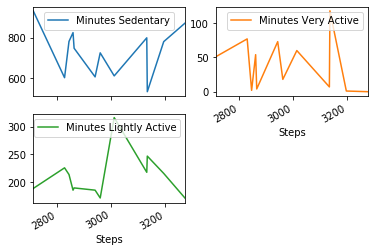

In [30]:
# your code here


fitbit3 = fitbit[["Minutes Sedentary","Minutes Very Active","Minutes Lightly Active","Steps"]]
#fitbit.columns

fitbit3 = fitbit3.sort_values(by=['Steps'])

fitbit3.set_index("Steps").plot(subplots=True , layout=(2, 2))

In [ ]:
fig, axes = plt.subplots(3, figsize = (10,5))
axes[1].plot(x,y)
axes[1].set_xlabel("label x")
axes[0].set_ylabel("label y")
axes[0].plot(x,z)
axes[0].set_title("help")

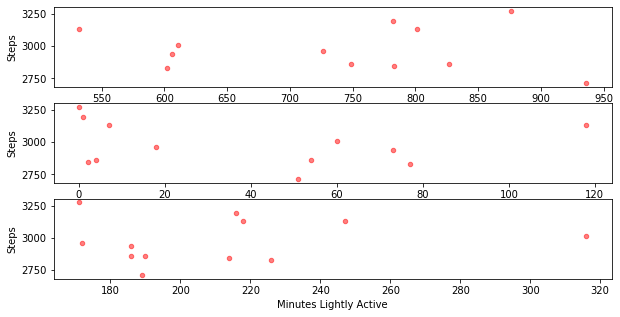

In [33]:
fig, axes = plt.subplots(3, figsize = (10,5))
for xcol, axes in zip(["Minutes Sedentary","Minutes Very Active","Minutes Lightly Active"], axes):
    fitbit3.plot(kind='scatter', x=xcol, y='Steps', ax=axes, alpha=0.5, color='r')

'Steps'

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [34]:
# your code here

titanic = pd.read_csv("titanic.csv")



#### Explore the titanic dataset using Pandas dtypes.

In [35]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

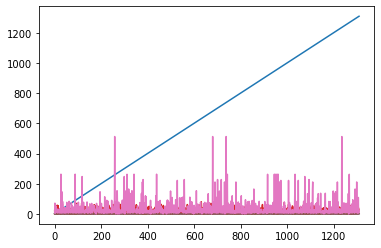

In [36]:
# NUMERICAL VARIABLES
# your code here

g = titanic.columns.to_series().groupby(titanic.dtypes).groups
number_titan=titanic.select_dtypes(include="number")
plt.plot(number_titan)

In [37]:
# CATEGORICAL VARIABLES
# your code here

categ_titan=titanic.select_dtypes(exclude="number")

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [38]:
# your code here
import seaborn as sns


#### Use the right visulalization to show the distribution of column `Age`.

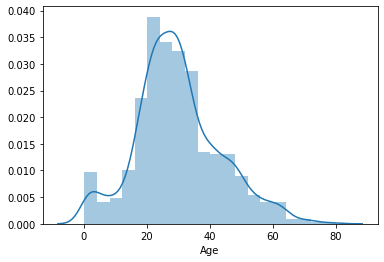

In [39]:
# your code here

sns.distplot(titanic['Age'], bins=20)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

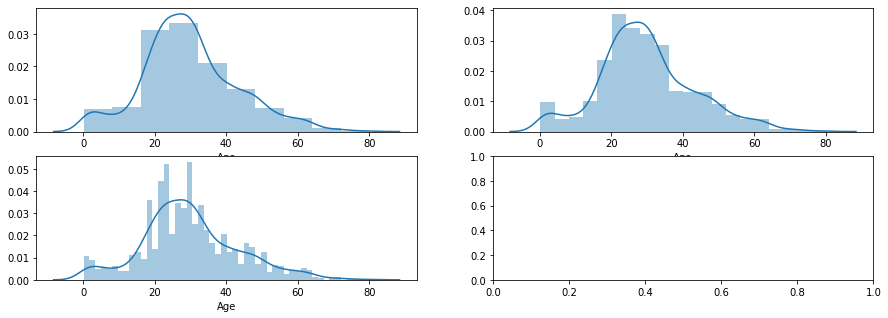

In [40]:
# your code here
f, axes = plt.subplots(2, 2, figsize = (15,5))
sns.distplot(titanic['Age'], bins=20,ax=axes[0,1])
sns.distplot(titanic['Age'], bins=10,ax=axes[0,0])
sns.distplot(titanic['Age'], bins=50,ax=axes[1,0])

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here: as the bin size increase we can see that some outliers start to show and the
bin structure stops following the distribution
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

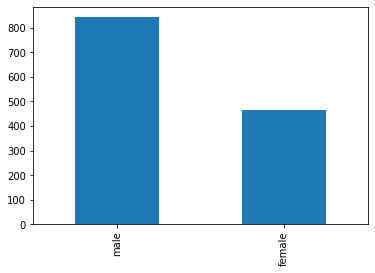

In [41]:
# Method 1 - matplotlib
# your code here
titanic['Gender'].value_counts().plot(kind='bar')


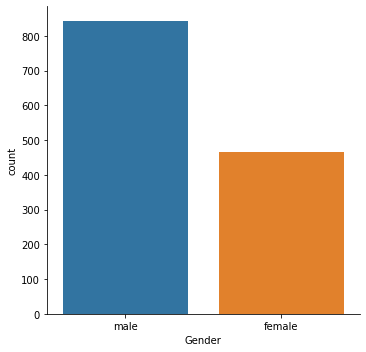

In [42]:
# Method 2 - seaborn
# your code here

sns.catplot(x="Gender", kind="count", data=titanic);

#### Use the right plot to visualize the column `Pclass`.

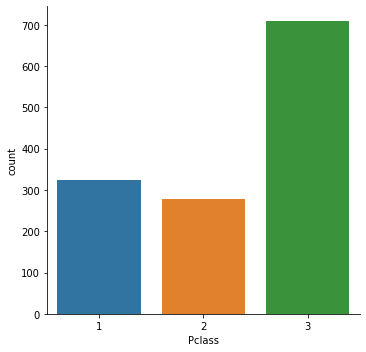

In [43]:
# your code here

sns.catplot(x="Pclass", kind="count", data=titanic);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

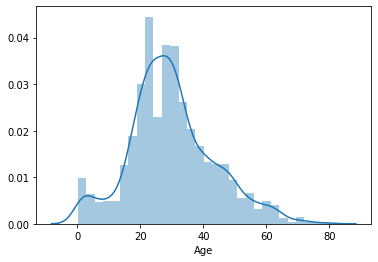

In [51]:
# your code here
sns.distplot(titanic['Age'])
#plt.hist(titanic['Age'], histtype = "stepfilled")

In [52]:
"""
your comments here: I would use a distribution seaborn plot to have bith the histo gram and the aproximated 
distribution fucntion
"""


29.87918569825532

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here: with the histogram we can see the mode and that there is a hohger frequence of people 
aged from 0 to 10. and that the mean is close to 30. also we can see that the standart variation ist that high due to a slim curve
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here same as above
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

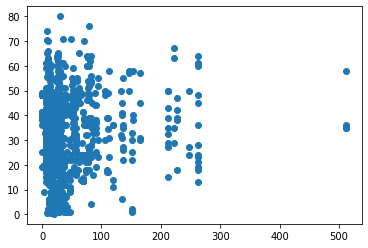

In [54]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic['Fare'],titanic['Age'])

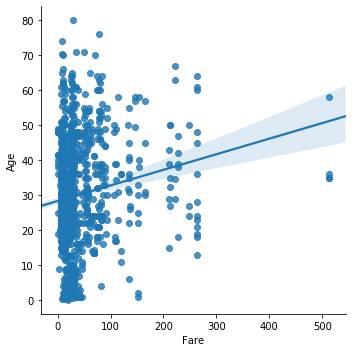

In [61]:
# Method 2 - seaborn
# your code here

sns.lmplot(x = 'Fare', y = 'Age', data=titanic, fit_reg=True)

#### Plot the correlation matrix using seaborn.

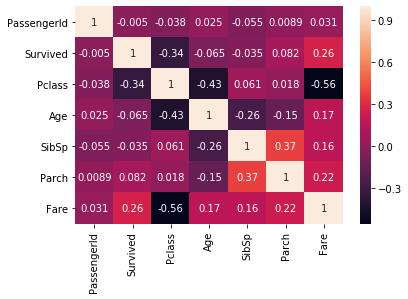

In [63]:
# your code here

corr = titanic.corr()

sns.heatmap(corr, annot=True)

#### What are the most correlated features?

In [ ]:
"""
your comments here: Pclass has the 3 most correlated features with Fare , Age and Survived respectively
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

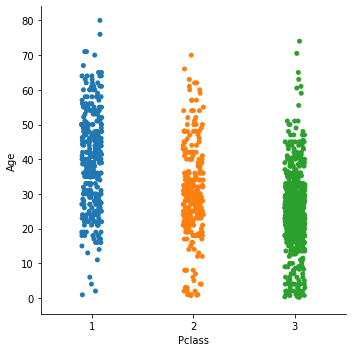

In [64]:
# your code here

sns.catplot(x="Pclass" ,y= "Age", data=titanic);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

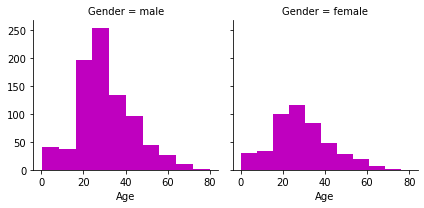

In [67]:
# your code here
g = sns.FacetGrid(titanic, col="Gender", col_order=["male", "female"]) 
g = g.map(plt.hist, "Age", color="m")


0         male
1       female
2       female
3       female
4         male
5         male
6         male
7         male
8       female
9       female
10      female
11      female
12        male
13        male
14      female
15      female
16        male
17        male
18      female
19      female
20        male
21        male
22      female
23        male
24      female
25      female
26        male
27        male
28      female
29        male
         ...  
1279      male
1280      male
1281      male
1282    female
1283      male
1284      male
1285      male
1286    female
1287      male
1288    female
1289      male
1290      male
1291    female
1292      male
1293    female
1294      male
1295      male
1296      male
1297      male
1298      male
1299    female
1300    female
1301    female
1302    female
1303    female
1304      male
1305    female
1306      male
1307      male
1308      male
Name: Gender, Length: 1309, dtype: object